Patrick Gray (patrick.c.gray at duke) - https://github.com/patrickcgray

Chapter 8: Use xarray to handle N-dimensional arrays, interactive plotting with geoviews, and parallelization
===============================================================

In many cases in the earth sciences you will be working with remote sensing data that has dense time series and is highly dimensional (e.g. lat x long x time x measurements). Often times working with this data as a typical numpy array my be clunky and error prone and keeping the data in the labeled format with metadata could help resolve many of the errors a data scientists might make. Additionally many of the datasets are so large they can not effectively fit in memory or should be processed in parallel. Here we'll introduce [`xarray`](http://xarray.pydata.org/en/stable/) which effectively resolves nearly all of these challenges. From the documentation: 

>Multi-dimensional (a.k.a. N-dimensional, ND) arrays (sometimes called “tensors”) are an essential part of computational science. They are encountered in a wide range of fields, including physics, astronomy, geoscience, bioinformatics, engineering, finance, and deep learning. In Python, NumPy provides the fundamental data structure and API for working with raw ND arrays. However, real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc.
>
>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience.
>
>Xarray is inspired by and borrows heavily from pandas, the popular data analysis package focused on labeled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing.

<img src="../data/dataset-diagram.png" alt="drawing" width="750"/>

<br>

In this chapter we'll be using `xarray` to process precipitation data from the [Integrated Multi-satellitE Retrievals for GPM (IMERG)](https://pmm.nasa.gov/resources/documents/gpm-integrated-multi-satellite-retrievals-gpm-imerg-algorithm-theoretical-basis) dataset over the Amazon. We'll also be leveraging [`holoviews`](http://holoviews.org/) and [`geoviews`](http://geoviews.org/) in the high level plotting API [`hvplot`](https://hvplot.pyviz.org/). Holoviews is an impressively powerful python library for interactive . Geoviews "is a Python library that makes it easy to explore and visualize geographical, meteorological, and oceanographic datasets, such as those used in weather, climate, and remote sensing research." And `hvplot` is a high level API that provides a consistent and simple interface for using `holoviews` and `geoviews` when plotting any of its supported data types (e.g. Pandas DataFrames, XArray: Datasets, Dask DataFrames, GeoPandas: GeoDataFrames, and much more0

/usr/local/envs/earthml/lib/python3.6/site-packages/datashader/transfer_functions.py:21: FutureWarning: xarray subclass Image should explicitly define __slots__
  class Image(xr.DataArray):


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
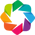

In [1]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
# numpy 
import numpy as np
import dask
# xarray (very handy)
import xarray as xr
import rasterio
# http://geo.holoviews.org/index.html
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import warnings
gv.extension('bokeh')

#### Simple xarray DataArrays

In [2]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [3]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [4]:
da = xr.DataArray([9, 0, 2, 1, 0],
                  dims=['x'],
                  coords={'x': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

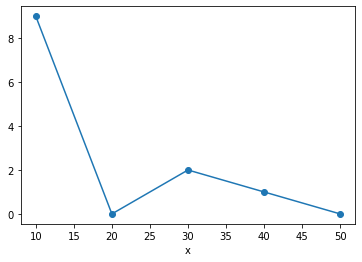

In [5]:
da.plot(marker='o')

## Working with our IMERG Precipitation Dataset

#### Download Precip Data

To begin let's download our data from NASA's Goddard Earth Sciences (GES) Data and Information Services Center (DISC). **This data is already available in the data/ directory of this repo** but we're including instructions here for you to be able to explore new areas and get a sample of how to download data from a NASA repository.

The syntax below is based on instructions from the DISC https://disc.gsfc.nasa.gov/data-access

First you will need to make an account on NASA EarthData https://urs.earthdata.nasa.gov/users/new 

Next search on https://disc.gsfc.nasa.gov/ for the dataset you want. The dataset we use is the IMERG daily 0.1 x 0.1 final research grade product available here: https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary?keywords=IMERG.

Next create a text file called `imerg_links.txt` by clicking "Subset / Get Data" and subsetting to your area of interest for the time period you want to explore. We recommend you get all variables and use NetCDF4 file format.

Finally run the terminal commands in the block below after filling in you EarthData username and password:

In [ ]:
%cd ~/
! touch .netrc
! echo "machine urs.earthdata.nasa.gov login <username> password <password>" >> .netrc
! chmod 0600 .netrc
! touch .urs_cookies
%cd -
! wget -P ../data/IMERG/ --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --auth-no-challenge=on --keep-session-cookies --content-disposition -i imerg_links.txt

### Now that we have the data let's explore it a bit

In [27]:
single_imerg_xds = xr.open_dataset("../data/IMERG/3B-DAY.MS.MRG.3IMERG.20180201-S000000-E235959.V06.nc4.nc4")
single_imerg_xds['time'] = single_imerg_xds.indexes['time'].to_datetimeindex()
single_imerg_xds

/usr/local/envs/earthml/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


<xarray.Dataset>
Dimensions:                    (lat: 501, lon: 550, nv: 2, time: 1)
Coordinates:
  * lat                        (lat) float32 -35.05 -34.95 ... 14.950002
  * lon                        (lon) float32 -84.95 -84.85 ... -30.049992
  * nv                         (nv) float32 0.0 1.0
  * time                       (time) datetime64[ns] 2018-02-01
Data variables:
    precipitationCal           (time, lon, lat) float32 ...
    HQprecipitation            (time, lon, lat) float32 ...
    precipitationCal_cnt       (time, lon, lat) int16 ...
    randomError                (time, lon, lat) float32 ...
    randomError_cnt            (time, lon, lat) int16 ...
    time_bnds                  (time, nv) object ...
    precipitationCal_cnt_cond  (time, lon, lat) int16 ...
    HQprecipitation_cnt        (time, lon, lat) int16 ...
    HQprecipitation_cnt_cond   (time, lon, lat) int16 ...
Attributes:
    BeginDate:       2018-02-01
    BeginTime:       00:00:00.000Z
    EndDate:         

#### let's just plot it normally

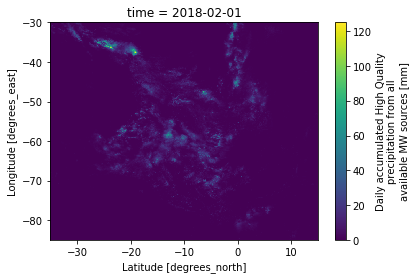

In [60]:
single_imerg_xds.HQprecipitation.plot()

How about if we plot it averaging along the longitude and time dimensions and showing rain amount across latitude 

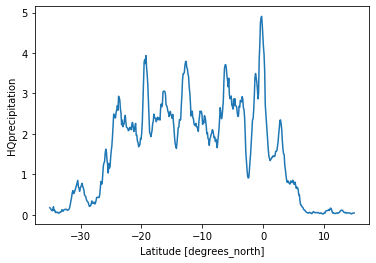

In [37]:
single_imerg_xds.HQprecipitation.mean(dim=('lon', 'time')).plot()

This gives a little glimpse at how easy it is to handle complex datasets with xarray

#### But a lot of the real power of xarray comes in when we have dense time series so let's pull in all of our data.

`open_mfdataset()` opens multiple files into a single xarray dataset, concatenating them along the time dimension in this case

In [27]:
imerg_xds = xr.open_mfdataset('../data/IMERG/3B-DAY.MS.MRG.3IMERG.2018*.nc4',combine='by_coords', parallel=True)
imerg_xds['time'] = imerg_xds.indexes['time'].to_datetimeindex()
imerg_xds

/usr/local/envs/earthml/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


<xarray.Dataset>
Dimensions:                    (lat: 501, lon: 550, nv: 2, time: 303)
Coordinates:
  * nv                         (nv) float32 0.0 1.0
  * lat                        (lat) float32 -35.05 -34.95 ... 14.950002
  * lon                        (lon) float32 -84.95 -84.85 ... -30.049992
  * time                       (time) datetime64[ns] 2018-02-01 ... 2018-11-30
Data variables:
    precipitationCal           (time, lon, lat) float32 dask.array<chunksize=(1, 550, 501), meta=np.ndarray>
    HQprecipitation            (time, lon, lat) float32 dask.array<chunksize=(1, 550, 501), meta=np.ndarray>
    precipitationCal_cnt       (time, lon, lat) int16 dask.array<chunksize=(1, 550, 501), meta=np.ndarray>
    randomError                (time, lon, lat) float32 dask.array<chunksize=(1, 550, 501), meta=np.ndarray>
    randomError_cnt            (time, lon, lat) int16 dask.array<chunksize=(1, 550, 501), meta=np.ndarray>
    time_bnds                  (time, nv) object dask.array<chunk

How about we look at daily rainfall averaged across all of the Amazon

In [28]:
rainfall = imerg_xds.HQprecipitation
rainfall

<xarray.DataArray 'HQprecipitation' (time: 303, lon: 550, lat: 501)>
dask.array<concatenate, shape=(303, 550, 501), dtype=float32, chunksize=(1, 550, 501), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -35.05 -34.95 -34.85 ... 14.850003 14.950002
  * lon      (lon) float32 -84.95 -84.85 -84.74999 ... -30.149998 -30.049992
  * time     (time) datetime64[ns] 2018-02-01 2018-02-02 ... 2018-11-30
Attributes:
    units:         mm
    long_name:     Daily accumulated High Quality precipitation from all avai...
    origname:      HQprecipitation
    fullnamepath:  /HQprecipitation

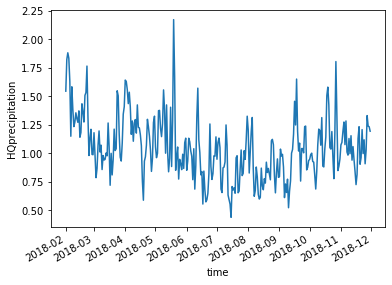

In [29]:
rainfall.mean(dim=('lat', 'lon')).plot()

### Now let's bring in `hvplot` and see what it can do

In [30]:
import hvplot
import hvplot.pandas
import hvplot.xarray

First let's make that same plot but interactive

In [31]:
rainfall.mean(dim=('lat', 'lon')).hvplot().relabel("Daily Rain")

:Curve   [time]   (HQprecipitation)

In [38]:
rainfall.mean(dim='time').hvplot(x="lon", y="lat", width=500, height=300, cmap='jet')

:Image   [lon,lat]   (HQprecipitation)

Now let's check out the Spatial Distribution of Monthly Rainfall

In [46]:
monthly_rainfall = rainfall.resample(time='M').mean()

monthly_rainfall.hvplot(x="lon", y="lat", width=500, height=300, cmap='jet')

:DynamicMap   [time]
   :Image   [lon,lat]   (HQprecipitation)

Pretty cool but it would be useful to have a better idea of where we are in the world!

We'll pull in cartopy and geoviews.feature to give projections and global features respectively. Explore options at https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html and http://geoviews.org/user_guide/Geometries.html.

In [64]:
import cartopy.crs as ccrs
import geoviews.feature as gf

# the * operator allows you to add multiple holoviews plots to the same final plot
gf.ocean * \
gf.land * \
monthly_rainfall.hvplot(x="lon", y="lat", width=500, height=300, cmap='jet',projection=ccrs.Orthographic(-55, -10),
    global_extent=True,) * \
gf.coastline * \
gf.borders

:DynamicMap   [time]
   :Overlay
      .Ocean.I     :Feature   [Longitude,Latitude]
      .Land.I      :Feature   [Longitude,Latitude]
      .Image.I     :Image   [lon,lat]   (HQprecipitation)
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]

In [65]:
gv.tile_sources.EsriTerrain * \
monthly_rainfall.hvplot(x="lon", y="lat", width=500, height=300, alpha=0.3, cmap='jet', geo=True) * \
gf.coastline * \
gf.borders

:DynamicMap   [time]
   :Overlay
      .WMTS.I      :WMTS   [Longitude,Latitude]
      .Image.I     :Image   [lon,lat]   (HQprecipitation)
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]

## Now let's look into parallelization

In [8]:
from dask.distributed import Client
from dask_ml.cluster import SpectralClustering

client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

<Client: 'tcp://127.0.0.1:36577' processes=2 threads=4, memory=2.00 GB>

In [9]:
X = client.persist(imerg_xds.HQprecipitation)
X.shape

(303, 550, 501)

In [10]:
clf = SpectralClustering(n_clusters=8, random_state=0, gamma=None,
                         kmeans_params={'init_max_iter': 5},
                         persist_embedding=True)

In [11]:
%time clf.fit(X)

ValueError: Found array with dim 3. Estimator expected <= 2.

## Final Wrap-up and Next Steps

Congrats on making it this far! Here we downloaded MODIS SST imagery from Google Earth Engine, cleaned this data, and analyzed it for seasonality and trends. 

#### What's next?

Now that you've gotten a taste of using python for GIS and remote sensing we recommend keeping up with the top journals, playing with other labs like this one, and explore the whole python geospatial community. Some examples:
- follow some top research journals such as [Remote Sensing of Environment](https://www.journals.elsevier.com/remote-sensing-of-environment), [IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing](https://ieeexplore.ieee.org/xpl/RecentIssue.jsp?punumber=4609443), and [ISPRS Journal of Photogrammetry and Remote Sensing](https://www.journals.elsevier.com/isprs-journal-of-photogrammetry-and-remote-sensing)
- explore other good notebooks and tutorials like https://github.com/planetlabs/notebooks
- play with all the amazing datasets out there (e.g. Earth on AWS https://aws.amazon.com/earth/)
- self-teach all the other cool open source python geospatial tools: https://github.com/sacridini/Awesome-Geospatial#python 
